<a href="https://colab.research.google.com/github/pawel0508/NeuralNetworks/blob/main/Save_Load_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

sns.set()
tf.__version__



'2.3.0'

### **Zapisywanie i ładowanie wag z modelu**
Celem tego notebook'a jest nauczenie się pracy z obsługą modeli, m.in.:

* zapisanie wag po każdej epoce
* zapisanie wag po określonej liczbie epok
* załadowanie wag
* zapisanie całego modelu
* załadowanie całego modelu

#### **Załadowanie danych i wstępna selekcja**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


(-0.5, 27.5, 27.5, -0.5)

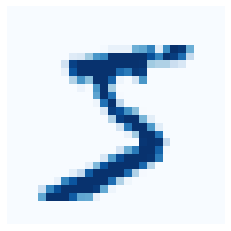

In [3]:
plt.imshow(x_train[0], cmap = 'Blues')
plt.grid(False)
plt.axis(False)

In [4]:
y_train[0]

5

In [5]:
x_train = x_train[:1000].reshape(-1, 28*28)/255.
x_test = x_test[:1000].reshape(-1, 28*28)/255.

y_train = y_train[:1000]
y_test = y_test[:1000]

### **Budowa modelu**

In [7]:
def create_model():
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(784,)))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### **Zapisywanie punktów kontrolnych podczas trenowania**


In [12]:
checkpoint_path = 'training/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

cp_callback = ModelCheckpoint(filepath = checkpoint_path, 
                              save_weights_only = True,
                              verbose = 1)

model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test), callbacks = [cp_callback])

Epoch 1/10
25/32 [======================>.......] - ETA: 0s - loss: 0.0350 - accuracy: 0.9962
Epoch 00001: saving model to training/cp.ckpt
32/32 [==============================] - 0s 13ms/step - loss: 0.0342 - accuracy: 0.9970 - val_loss: 0.3924 - val_accuracy: 0.8750
Epoch 2/10
29/32 [==========================>...] - ETA: 0s - loss: 0.0276 - accuracy: 0.9989
Epoch 00002: saving model to training/cp.ckpt
32/32 [==============================] - 0s 12ms/step - loss: 0.0270 - accuracy: 0.9990 - val_loss: 0.3900 - val_accuracy: 0.8730
Epoch 3/10
29/32 [==========================>...] - ETA: 0s - loss: 0.0190 - accuracy: 1.0000
Epoch 00003: saving model to training/cp.ckpt
32/32 [==============================] - 0s 12ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.4000 - val_accuracy: 0.8760
Epoch 4/10
27/32 [========================>.....] - ETA: 0s - loss: 0.0187 - accuracy: 1.0000
Epoch 00004: saving model to training/cp.ckpt
32/32 [==============================] - 0s 13ms/s

In [15]:
ls -l {checkpoint_dir}

total 4784
-rw-r--r-- 1 root root      71 Oct 25 21:21 checkpoint
-rw-r--r-- 1 root root 4886673 Oct 25 21:21 cp.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Oct 25 21:21 cp.ckpt.index


### **Załadowanie wag do modelu**

In [17]:
model = create_model()
loss, acc = model.evaluate(x_test, y_test, verbose = 2)
print(acc)

32/32 - 0s - loss: 2.3543 - accuracy: 0.0760
0.07599999755620956


In [18]:
model.load_weights(checkpoint_path)

In [19]:
loss, acc = model.evaluate(x_test, y_test, verbose = 2)
print(acc)

32/32 - 0s - loss: 0.4130 - accuracy: 0.8820
0.8820000290870667


In [20]:
!rm -rf ./training

In [23]:
checkpoint_path = 'training/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              period=5,
                              verbose=1)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))

model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[cp_callback], verbose=0)


Epoch 00005: saving model to training/cp-0005.ckpt

Epoch 00010: saving model to training/cp-0010.ckpt

Epoch 00015: saving model to training/cp-0015.ckpt

Epoch 00020: saving model to training/cp-0020.ckpt

Epoch 00025: saving model to training/cp-0025.ckpt

Epoch 00030: saving model to training/cp-0030.ckpt

Epoch 00035: saving model to training/cp-0035.ckpt

Epoch 00040: saving model to training/cp-0040.ckpt

Epoch 00045: saving model to training/cp-0045.ckpt

Epoch 00050: saving model to training/cp-0050.ckpt


In [24]:
!ls -l ./training

total 49400
-rw-r--r-- 1 root root      81 Oct 25 21:27 checkpoint
-rw-r--r-- 1 root root 1628730 Oct 25 21:27 cp-0000.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     402 Oct 25 21:27 cp-0000.ckpt.index
-rw-r--r-- 1 root root 4886697 Oct 25 21:27 cp-0005.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Oct 25 21:27 cp-0005.ckpt.index
-rw-r--r-- 1 root root 4886697 Oct 25 21:27 cp-0010.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Oct 25 21:27 cp-0010.ckpt.index
-rw-r--r-- 1 root root 4886697 Oct 25 21:27 cp-0015.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Oct 25 21:27 cp-0015.ckpt.index
-rw-r--r-- 1 root root 4886697 Oct 25 21:27 cp-0020.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Oct 25 21:27 cp-0020.ckpt.index
-rw-r--r-- 1 root root 4886697 Oct 25 21:27 cp-0025.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    1222 Oct 25 21:27 cp-0025.ckpt.index
-rw-r--r-- 1 root root 4886697 Oct 25 21:27 cp-0030.ckpt.data-00000-of-00001
-rw-r--r-- 1 roo

In [25]:
import tensorflow as tf

latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training/cp-0050.ckpt'

In [27]:

model = create_model()
model.load_weights(latest)

loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4679 - accuracy: 0.8780
0.878000020980835


### **Ręczne zapisywanie wag**

In [29]:
model.save_weights('./checkpoints/my_checkpoint')

model = create_model()

model.load_weights('./checkpoints/my_checkpoint')

loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4679 - accuracy: 0.8780
0.878000020980835


In [30]:

!ls -l checkpoints/

total 4780
-rw-r--r-- 1 root root      83 Oct 25 21:29 checkpoint
-rw-r--r-- 1 root root 4886170 Oct 25 21:29 my_checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root     944 Oct 25 21:29 my_checkpoint.index


### **Zapisywanie całego modelu**

In [32]:

model = create_model()
model.fit(x_train, y_train, epochs=5)
model.save('my_model.h5')

Epoch 1/5
32/32 [==============================] - 0s 5ms/step - loss: 1.2037 - accuracy: 0.6410
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.4353 - accuracy: 0.8670
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.3218 - accuracy: 0.9120
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.2202 - accuracy: 0.9490
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.1587 - accuracy: 0.9660


In [33]:
from tensorflow.keras.models import load_model

new_model = load_model('my_model.h5')
new_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [35]:
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4439 - accuracy: 0.0900
0.09000000357627869
